### [Introduction](#intro)
### [Part I. Methodology](#methodology)
## [part test](#test)
[Bottom](#bottom)

In [1]:
# 12:27pm

# Import libraries
from collections import Counter
import numpy as np
import pandas as pd

from mapboxgl.utils import *
from mapboxgl.viz import *

with open('Data/turnover_id.csv', 'r') as f:
    turnover = pd.read_csv(f, index_col = None)
    
with open('Data/turnover_address (QGIS_withneighbourhoods).csv', 'r') as f:
    turnover_address = pd.read_csv(f, index_col = None)
    
# Create a more compact dataframe without the change/exist columns
turnover_address_1 = pd.concat((turnover_address.sort_values('change_index', ascending = False).iloc[:,:1],
                                turnover_address.sort_values('change_index', ascending = False).iloc[:,14:]), axis = 1)


# Create a reference table for establishments and addresses.

turnover['first_exist'] = ['201'+str(list(i).index(1)) for i in turnover.values]
ests = turnover.groupby('address')['name'].apply(list)
yrs = turnover.groupby('address')['first_exist'].apply(list)
zipped = list(zip(ests, yrs))

est_by_add = pd.DataFrame(ests).join(pd.DataFrame(yrs))
est_by_add.reset_index(inplace=True)

# Clean fields to make it more readable. "Esta." must be clean as it will feed into the map labels later.
est_by_add['Esta.'] = [list(zip(i,j)) for (i,j) in zipped] 
est_by_add['name'] = [", ".join(i) for i in est_by_add['name']]
est_by_add['first_exist'] = [", ".join(i) for i in est_by_add['first_exist']]
est_by_add['Esta.'] = [", ".join(["{} ({})".format(j[0].title(), j[1]) for j in i]) for i in est_by_add['Esta.']]



# Part I. Methodology 
<a name = "methodology"></a>

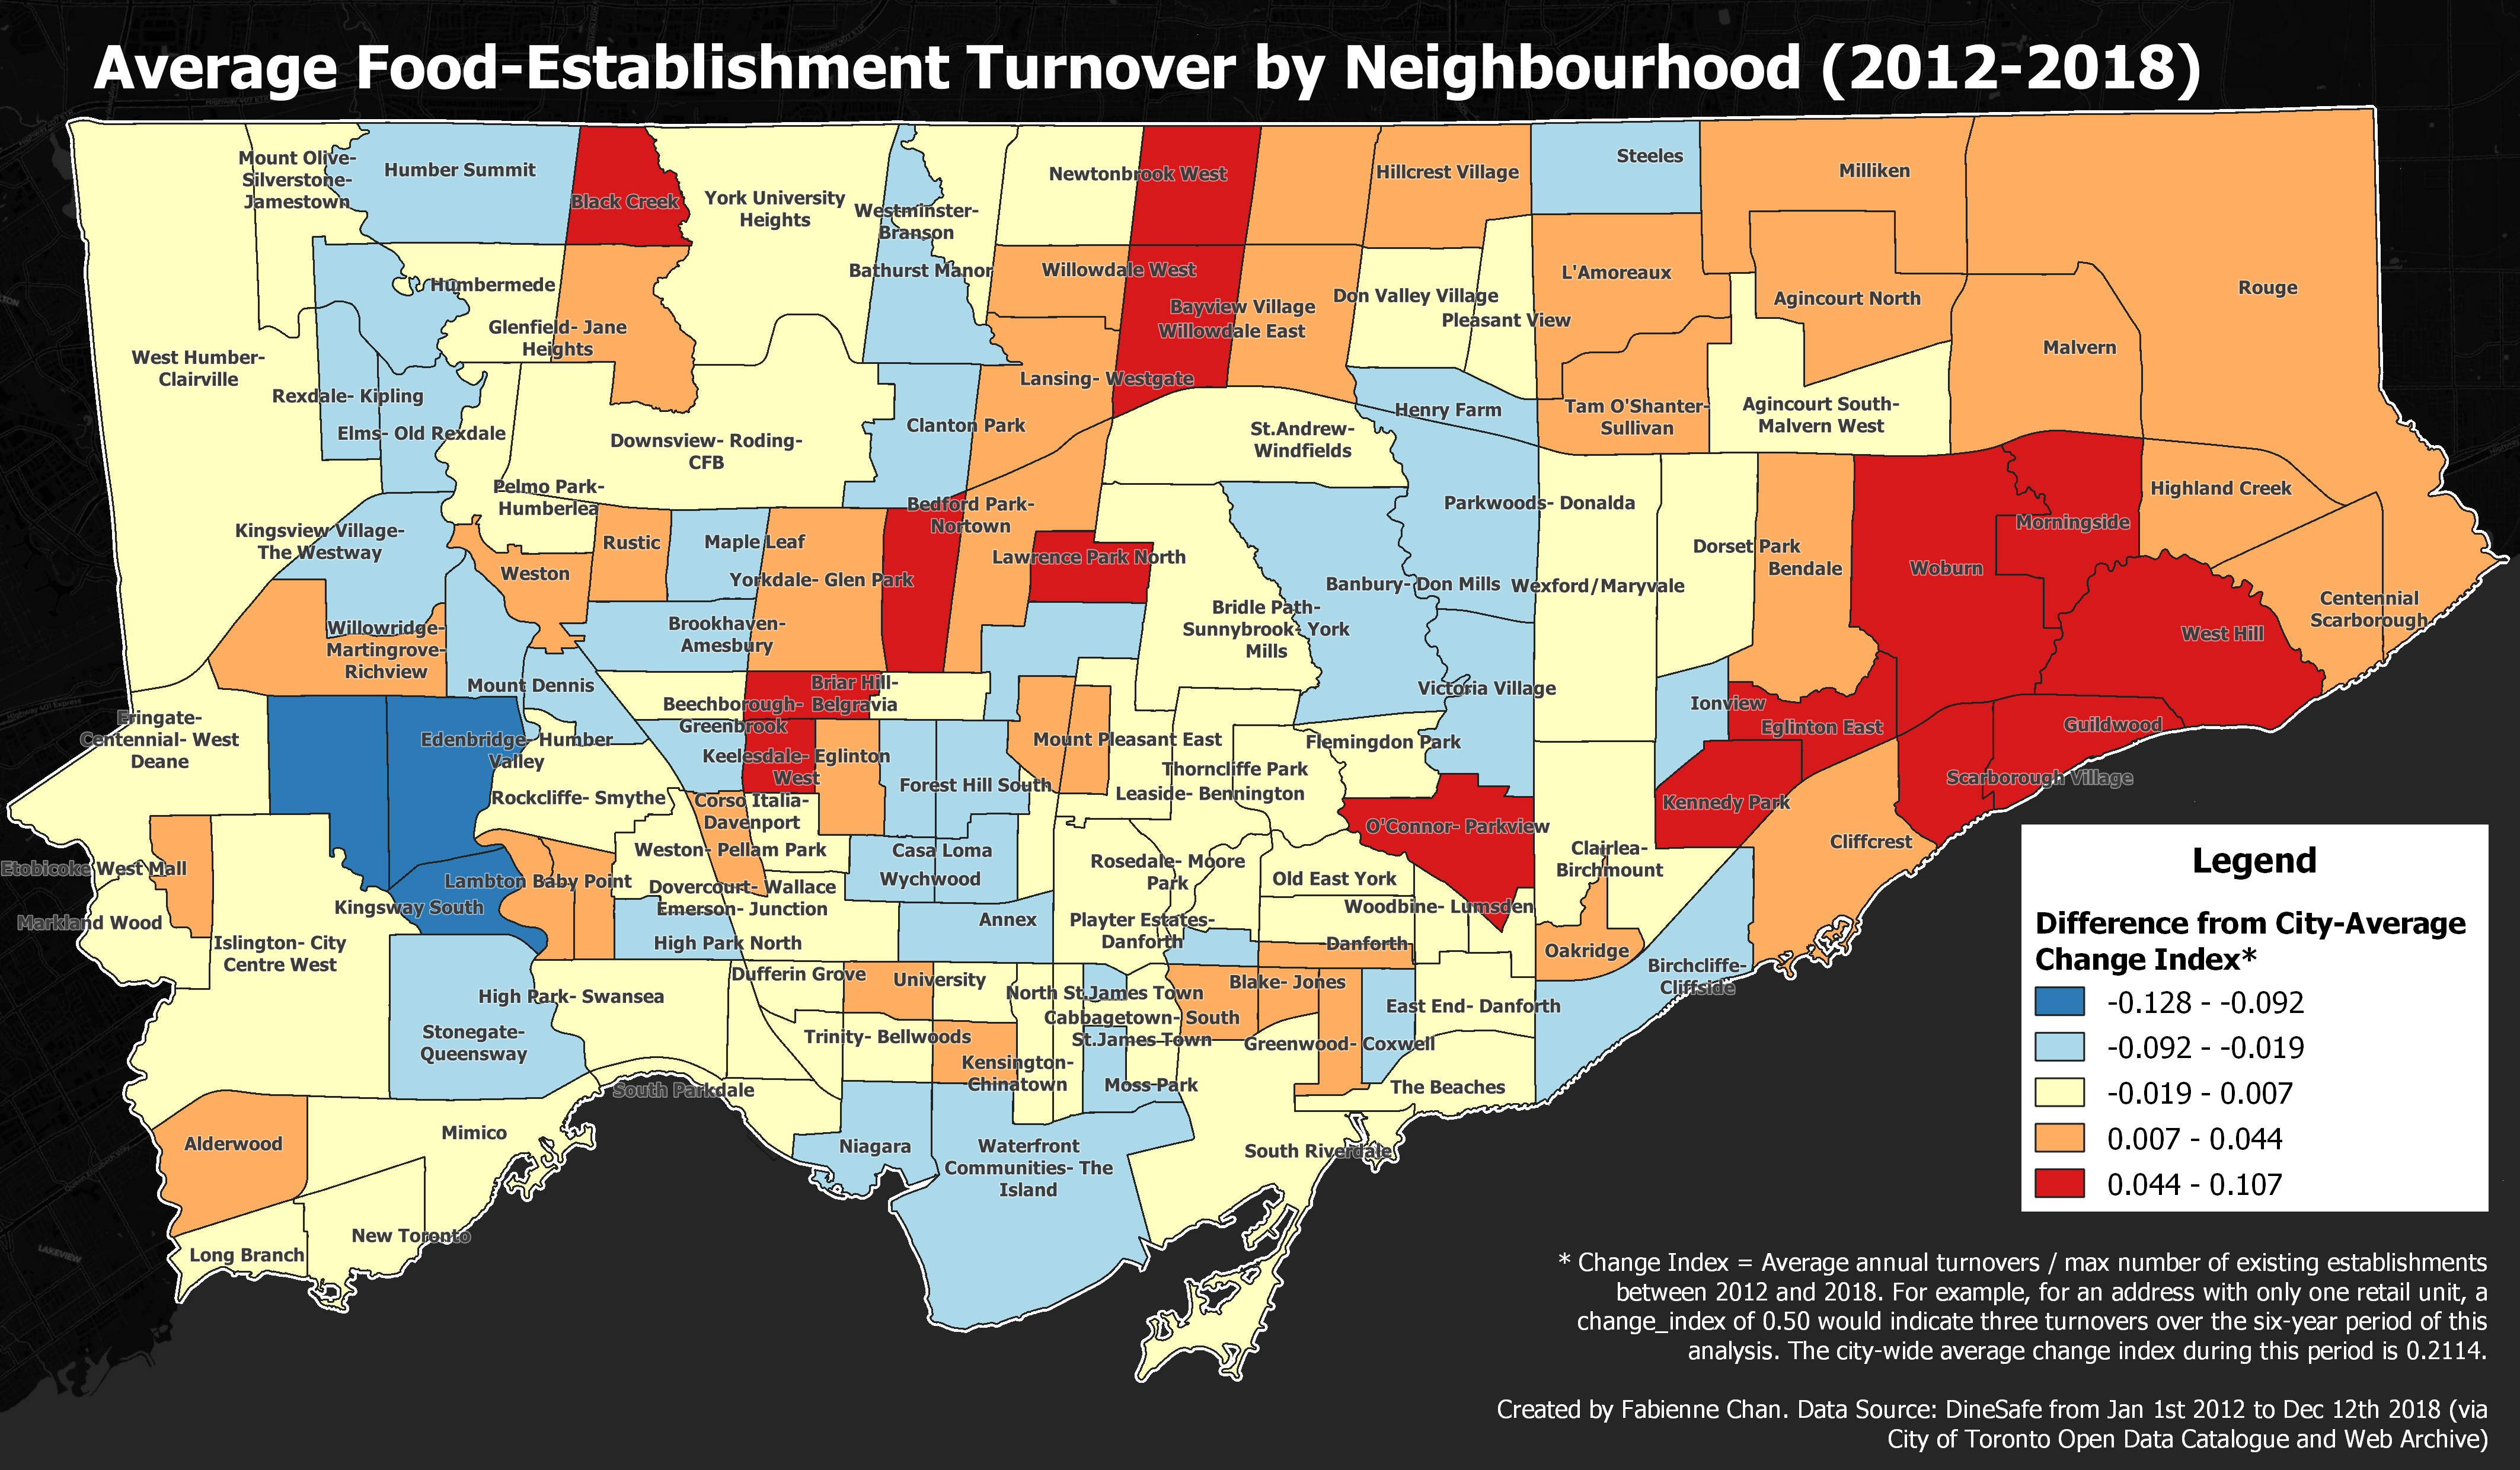

# Part 1.1 test
<a id="test"></a>

In [2]:
# Create dataframe to feed into map
# df = turnover_address.join(est_by_add[['address','Esta.']].set_index('address'), on='address', how = 'left')
data_url = 'https://raw.githubusercontent.com/fabhlc/DineSafe/master/turnover_points_for_map.csv'
df = pd.read_csv(data_url, encoding = 'ANSI')

df_to_geojson(df,
              filename='markers.geojson',
              properties = ['address','total_turnover','annual_turnover','max_units','change_index','Esta.'],
              lat='LATITUDE', lon='LONGITUDE', precision=3)

# Read private token from local file 
with open('mapbox_token.txt','r') as f:
    token = f.read()

# The leftmost and rightmost bin edges
first_edge, last_edge = df['change_index'].min(), df['change_index'].max()
n_equal_bins = 5
color_breaks = np.linspace(start=first_edge, stop=last_edge, num=n_equal_bins + 1, endpoint=True)

# Generate data breaks and color stops from colorBrewer
color_stops = create_color_stops(np.round(color_breaks,3), colors='YlOrRd')

viz = CircleViz('markers.geojson', access_token=token, 
                radius = 2, center = (-79.342406,43.720250), # DVP/Lawrence
                zoom = 10,
                color_property = 'change_index',
                color_stops=color_stops,
                label_color = '#69F0AE',
                color_default='#69F0AE',
                stroke_color='#a7a7a7',
               stroke_width = 0.1)
viz.show()

This is the bottom.
<div id="bottom"></div>